# Network Analysis with Python 2

You'll gain the conceptual and practical skills to analyze evolving time series of networks, learn about bipartite graphs, and how to use bipartite graphs in product recommendation systems. You'll also learn about graph projections, why they're so useful in Data Science, and figure out the best ways to store and load graph data from files.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx

path = 'data/dc24/'

## Definitions and Recap

<img src="images/graphs201.png" alt="" style="width: 400px;"/>

<img src="images/graphs202.png" alt="" style="width: 400px;"/>


In [ ]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.node[n]['centrality'] = dcs[n]

## Bipartite graphs

<img src="images/graphs203.png" alt="" style="width: 400px;"/>

<img src="images/graphs204.png" alt="" style="width: 400px;"/>

<img src="images/graphs205.png" alt="" style="width: 400px;"/>

<img src="images/graphs206.png" alt="" style="width: 400px;"/>


In [ ]:
# https://networkx.github.io/documentation/stable/reference/readwrite/yaml.html
#nx.write_yaml(G, 'path_for_yaml_file')

# https://networkx.github.io/documentation/stable/reference/readwrite/gexf.html
# nx.write_gexf(G, 'file_name')

In [11]:
G = nx.read_gexf(path+'G.xml')

In [13]:
type(G.edges())

networkx.classes.reportviews.EdgeView

## The bipartite keyword

The `'bipartite'` keyword is part of a `node's metadata dictionary`, and can be assigned both when you add a node and after the node is added. Remember, though, that by definition, in a **bipartite graph**, `a node cannot be connected to another node in the same partition`.

Here, you're going to write a function that returns the nodes from a given partition in a **bipartite graph**. In this case, the relevant partitions of the Github bipartite graph you'll be working with are 'projects' and 'users'.

- Write a function called `get_nodes_from_partition()` which accepts two arguments - a bipartite graph G and a partition of G - and returns just the nodes from that partition.
    - Iterate over all the nodes of G (not including the metadata) using a for loop.
    - Access the `'bipartite'` keyword of the current node's metadata dictionary. If it equals partition, append the current node to the list nodes.
- Use your `get_nodes_from_partition()` function together with the `len()` function to:
    - Print the number of nodes in the 'projects' partition of G.
    - Print the number of nodes in the 'users' partition of G.

In [15]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [16]:
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

11774
10677


## Degree centrality distribution of user nodes

In this exercise and the next one, you're going to do a final recap of material from the previous course. Your task is to plot the **degree centrality distributions** for each node partition in the **bipartite** version of the GitHub collaboration network. Here, you'll do this for the `'users'` partition. In the next exercise, you'll do this for the `'projects'` partition.

The function you wrote before, `get_nodes_from_partition()`, has been loaded for you. Just to remind you, the **"degree centrality"** `is a measure of node importance`, and the **"degree centrality distribution"** `is the list of degree centrality scores for all nodes in the graph`.

- Import matplotlib.pyplot as plt.
- Use your `get_nodes_from_partition()` function from the previous exercise to get a list called user_nodes corresponding to the 'users' nodes of G.
- Using the `nx.degree_centrality()` function, compute the degree centralities for each node in G. Store the result as `dcs`.
- Use a list comprehension to compute the degree centralities for each node in `user_nodes`. Store the result as `user_dcs`.
    - Remember, `dcs` is a dictionary, in which the keys are the nodes. The relevant nodes here are contained in `user_nodes`. How can you use this information to obtain the degree centralities of the user nodes? Use n as your iterator variable.
- Plot a histogram of the degree distribution of users, using `plt.hist()` and `user_dcs`.

In [17]:
# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

In [20]:
user_nodes[:10]

['u10002',
 'u21097',
 'u24070',
 'u31908',
 'u3885',
 'u5520',
 'u19224',
 'u16890',
 'u8121',
 'u753']

In [23]:
dict(list(dcs.items())[0:2])

{'u10002': 4.4543429844097995e-05, 'u21097': 4.4543429844097995e-05}

In [24]:
# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

In [26]:
user_dcs[:10]

[4.4543429844097995e-05,
 4.4543429844097995e-05,
 8.908685968819599e-05,
 4.4543429844097995e-05,
 0.00017817371937639198,
 0.00013363028953229398,
 4.4543429844097995e-05,
 4.4543429844097995e-05,
 4.4543429844097995e-05,
 4.4543429844097995e-05]

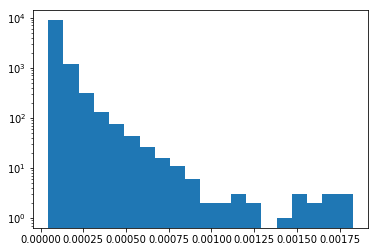

In [29]:
# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show();

## Degree centrality distribution of project nodes

Now it's time to plot the **degree cenrality distribution** for the 'projects' partition of G. The steps to do this are exactly the same as in the previous exercise.

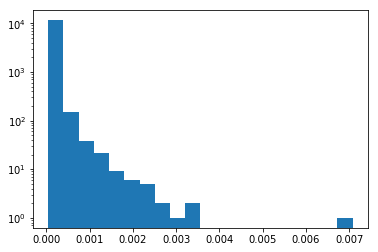

In [32]:
project_nodes = get_nodes_from_partition(G, 'projects')
project_dcs = [dcs[n] for n in project_nodes]
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show();

## Bipartite graphs and recommendation systems

<img src="images/graphs207.png" alt="" style="width: 400px;"/>


## Shared nodes in other partition

In order to build up your concept of **recommendation systems**, we are going to start with the fundamentals. The focus here is on `computing user similarity in bipartite graphs`.

Your job is to write a function that takes in two nodes, and returns the set of repository nodes that are shared between the two user nodes.

You'll find the following methods and functions helpful in this exercise - `.neighbors()`, `set()`, and `.intersection()` - besides, of course, the `shared_partition_nodes` function that you will define!

- Write a function called `shared_partition_nodes()` that takes in 3 arguments - a graph G, node1, and node2 - and returns the set of nodes that are shared between node1 and node2.
    - Check that node1 and node2 belong to the same partition using an assert statement and the 'bipartite' keyword.
    - Obtain the neighbors of node1 and store them as nbrs1.
    - Obtain the neighbors of node2 and store them as nbrs2.
- Compute the overlap between nbrs1 and nbrs2 using the set `.intersection()` method.
- Print the number of shared repositories between users 'u7909' and 'u2148' using your shared_partition_nodes() function together with the len() function.

In [33]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

In [34]:
# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))

3


## User similarity metric

Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to `write a function to compute a metric of similarity between two users`: the number of projects shared between two users divided by the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

- Complete the `user_similarity()` function to calculate the similarity between user1 and user2.
    - Use assert statements to check that user1 and user2 belong to the 'users' partition.
    - Use your `shared_partition_nodes()` function from the previous exercise to get the set of nodes shared between the two users user1 and user2.
    - Return the fraction of nodes in the projects partition. That is, divide the number of shared_nodes by the total number of nodes in the 'projects' partition.
- Compute the similarity score between users 'u4560' and 'u1880'. To do this:
    - First obtain the nodes in the 'projects' partition using your `get_nodes_from_partition()` function.
    - Then use your `user_similarity()` function to compute the score.

In [35]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

In [36]:
# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', project_nodes)

print(similarity_score)

0.0


It looks like these two users are not very similar!

## Find similar users

You're now going to build upon what you've learned so far to write a function called `most_similar_users()` that finds the users most similar to another given user.

The beginnings of this function have been written for you. A list of nodes, `user_nodes` has been created, which contains all of the users except the given user that has been passed into the function. Your task is to complete the function such that it finds the users most similar to this given user. You'll make use of your `user_similarity()` function from the previous exercise to help do this.

A dictionary called `similarities` has been setup, in which the keys are the scores and the list of values are the nodes.

- Iterate over user_nodes and compute the similarity between user and each user_node (n) using your user_similarity() function. Store the result as similarity.
- Append the score and node to the similarities dictionary. The key is the score - similarity - and the value is the node - n.
- Compute the maximum similarity score. To do this, first access the keys (which contain the scores) of similarities using the .keys() method and then use the max() function. Store the result as max_similarity.
- Return the list of users that share maximal similarity. This list of users is the value of the max_similarity key of similarities.
- Use your most_similar_users() function to print the list of users most similar to the user 'u4560'.

In [48]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)
    
    #print(len(user_nodes))

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)
        
        #print(similarity)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity], similarities

In [44]:
user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

similar_users, similarities = most_similar_users(G, 'u4560', user_nodes, project_nodes)

print(similar_users)

10676
['u9525', 'u1570', 'u53', 'u363', 'u14984', 'u2800']


In [46]:
similarities.keys()

dict_keys([0.0, 8.493290300662476e-05])

In [47]:
similarities[8.493290300662476e-05]

['u9525', 'u1570', 'u53', 'u363', 'u14984', 'u2800']

## Recommend repositories

Here, the task is to practice using set differences, and you'll apply it to recommending repositories from a second user that the first user should contribute to.

- Write a function called `recommend_repositories()` that accepts 3 arguments - G, from_user, and to_user - and returns the repositories that the from_user is connected to that the to_user is not connected to.
    - Get the set of repositories the from_user has contributed to and store it as from_repos. To do this, first obtain the neighbors of from_user and use the set() function on this.
    - Get the set of repositories the to_user has contributed to and store it as to_repos.
    - Using the `.difference()` method, return the repositories that the from_user is connected to that the to_user is not connected to.
- Print the repositories to be recommended from 'u7909' to 'u2148'.

In [49]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

In [50]:
# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))

{'p7408', 'p9312', 'p32418', 'p66'}


## Reading graphs

In this exercise, before you compute projections, you're going to practice working with one of NetworkX's disk I/O functions, `read_edgelist()`. `read_edgelist()` creates a graph from the edgelist file. The graph that you'll be working with is a bipartite graph describing the American Revolution. There are two node partitions - `'people'` and `'clubs'`, and edges denote a person being a member of a club.

In [61]:
# Import networkx
import networkx as nx

# Read in the data: g
G = nx.read_edgelist(path+'american-revolution.edgelist')

# Assign nodes to 'clubs' or 'people' partitions
# In the dataset, 'clubs' do not have a . symbol in their node name. 
#  Use this information to assign nodes to 'clubs' or 'people' partitions.
for n, d in G.nodes(data=True):
    if '.' in n:
        G.node[n]['bipartite'] = 'people'
    else:
        G.node[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(list(G.edges(data=True))[:1])

[('Bruce.Stephen', 'TeaParty', {'weight': 1})]


## Projections

<img src="images/graphs208.png" alt="" style="width: 400px;"/>

<img src="images/graphs209.png" alt="" style="width: 400px;"/>

<img src="images/graphs210.png" alt="" style="width: 400px;"/>

<img src="images/graphs211.png" alt="" style="width: 400px;"/>


## Computing projection

It's now time to try your hand at `computing the projection of a bipartite graph to the nodes on one of its partitions`. This will help you gain practice with `converting between a bipartite version of a graph and its unipartite projections`. The **"projection" of a graph onto one of its partitions** is the connectivity of the nodes in that partition conditioned on connections to nodes on the other partition. Made more concretely, you can think of the "connectivity of customers based on shared purchases".

To help you get started, here's a hint on list comprehensions. List comprehensions can include conditions, so if you want to filter a graph for a certain type of node, you can do: `[n for n, d in G.nodes(data=True) if d['key'] == 'some_value']`.

- Prepare the people nodelist using a list comprehension. If the 'bipartite' keyword of a node n in G equals 'people', then that node should be part of the nodelist.
- Prepare the clubs nodelist by iterating over the nodes of G, including the metadata. Here, note that you have to check if the 'bipartite' keyword of the metadata dictionary d equals 'clubs'. Note: This is simply an alternate way of creating the nodelist. You do not have to iterate over the metadata - you can follow the same approach you used to create the people nodelist, simply checking for 'clubs' instead. We're asking you to use the other approach here so you get practice with both.
- Use `nx.bipartite.projected_graph()` to compute the people and clubs projections. Store the results as `peopleG` and `clubsG`.
    - This function takes in two arguments: The graph G, and the nodelist.

In [55]:
# Prepare the nodelists needed for computing projections: people, clubs
people = [n for n in G.nodes() if G.node[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)

## Plot degree centrality on projection

Here, you're going to compare the **degree centrality distributions** for each of the following graphs: the original graph G, the people graph projection peopleG, and the clubs graph projection clubsG. This will reinforce the difference in **degree centrality score** computation between bipartite and unipartite versions of degree centrality metrics.

Recall that the bipartite functions require passing in a container of nodes, but will return all degree centrality scores nonetheless.

- Plot the **degree centrality distribution** of the original graph G, using the **degree_centrality** function from the bipartite module: `nx.bipartite.degree_centrality()`. It takes in two arguments: The graph G, and one of the node lists (people or clubs).
- Plot the **degree centrality distribution** of the peopleG graph, using the normal/non-bipartite **degree_centrality** function from NetworkX: `nx.degree_centrality()`.
- Plot the **degree centrality distribution** of the clubsG graph, using the normal/non-bipartite **degree_centrality** function from NetworkX: `nx.degree_centrality()`.
- In your calls to plt.hist(), remember to first use the `.values()` method on computed degree centralities and convert them into a list.

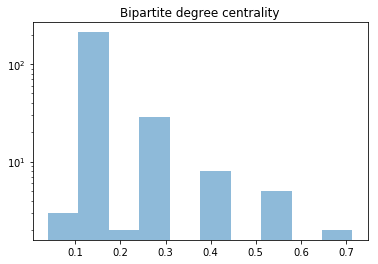

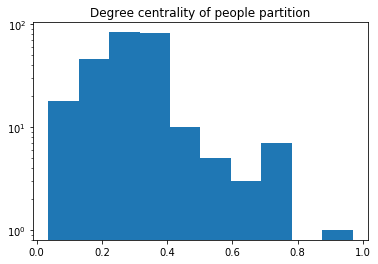

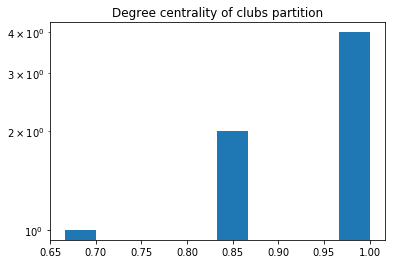

In [59]:
import matplotlib.pyplot as plt 

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show();

# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show();

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show();

Note that the distributions are quite different from one another. The disjoint histogram from the clubsG graph stems from its small number of nodes (only 7), while the peopleG histogram is more contiguous because of the large number of nodes in there. The bipartite degree centrality histogram has discrete values: this again stems from having only a small number of clubs nodes that the people nodes can connect to.

## Bipartite graphs as matrices and Matrix Multiplication in Python (>=3.5)

<img src="images/graphs212.png" alt="" style="width: 400px;"/>

<img src="images/graphs213.png" alt="" style="width: 400px;"/>

<img src="images/graphs214.png" alt="" style="width: 400px;"/>

<img src="images/graphs215.png" alt="" style="width: 400px;"/>

<img src="images/graphs216.png" alt="" style="width: 400px;"/>

<img src="images/graphs217.png" alt="" style="width: 400px;"/>

<img src="images/graphs218.png" alt="" style="width: 400px;"/>

<img src="images/graphs219.png" alt="" style="width: 400px;"/>


## 